In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import power_transform
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data =pd.read_csv("loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [9]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [10]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [11]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [12]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
data['Gender'] = data['Gender'].fillna('Female')
data['Dependents'] = data['Dependents'].fillna('3+')

In [18]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)

In [21]:
data =data.dropna(axis=0)

In [22]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
data =data.drop("Loan_ID" , axis =1 )

In [25]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
le =LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data["Married"]=le.fit_transform(data["Married"])
data["Dependents"]=le.fit_transform(data["Dependents"])
data["Education"]=le.fit_transform(data["Education"])
data["Self_Employed"]=le.fit_transform(data["Self_Employed"])
data["Property_Area"]=le.fit_transform(data["Property_Area"])
data["Loan_Status"]=le.fit_transform(data["Loan_Status"])

In [27]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


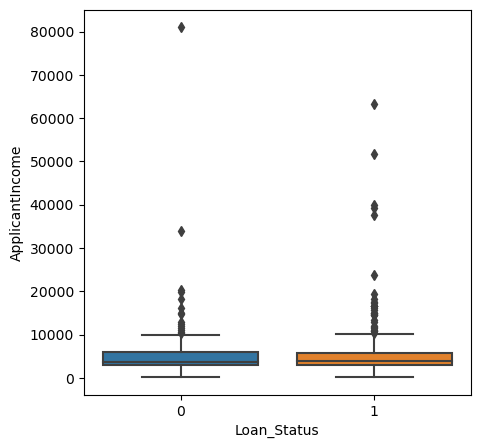

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(x ='Loan_Status' , y ="ApplicantIncome" ,data =data)
plt.show()

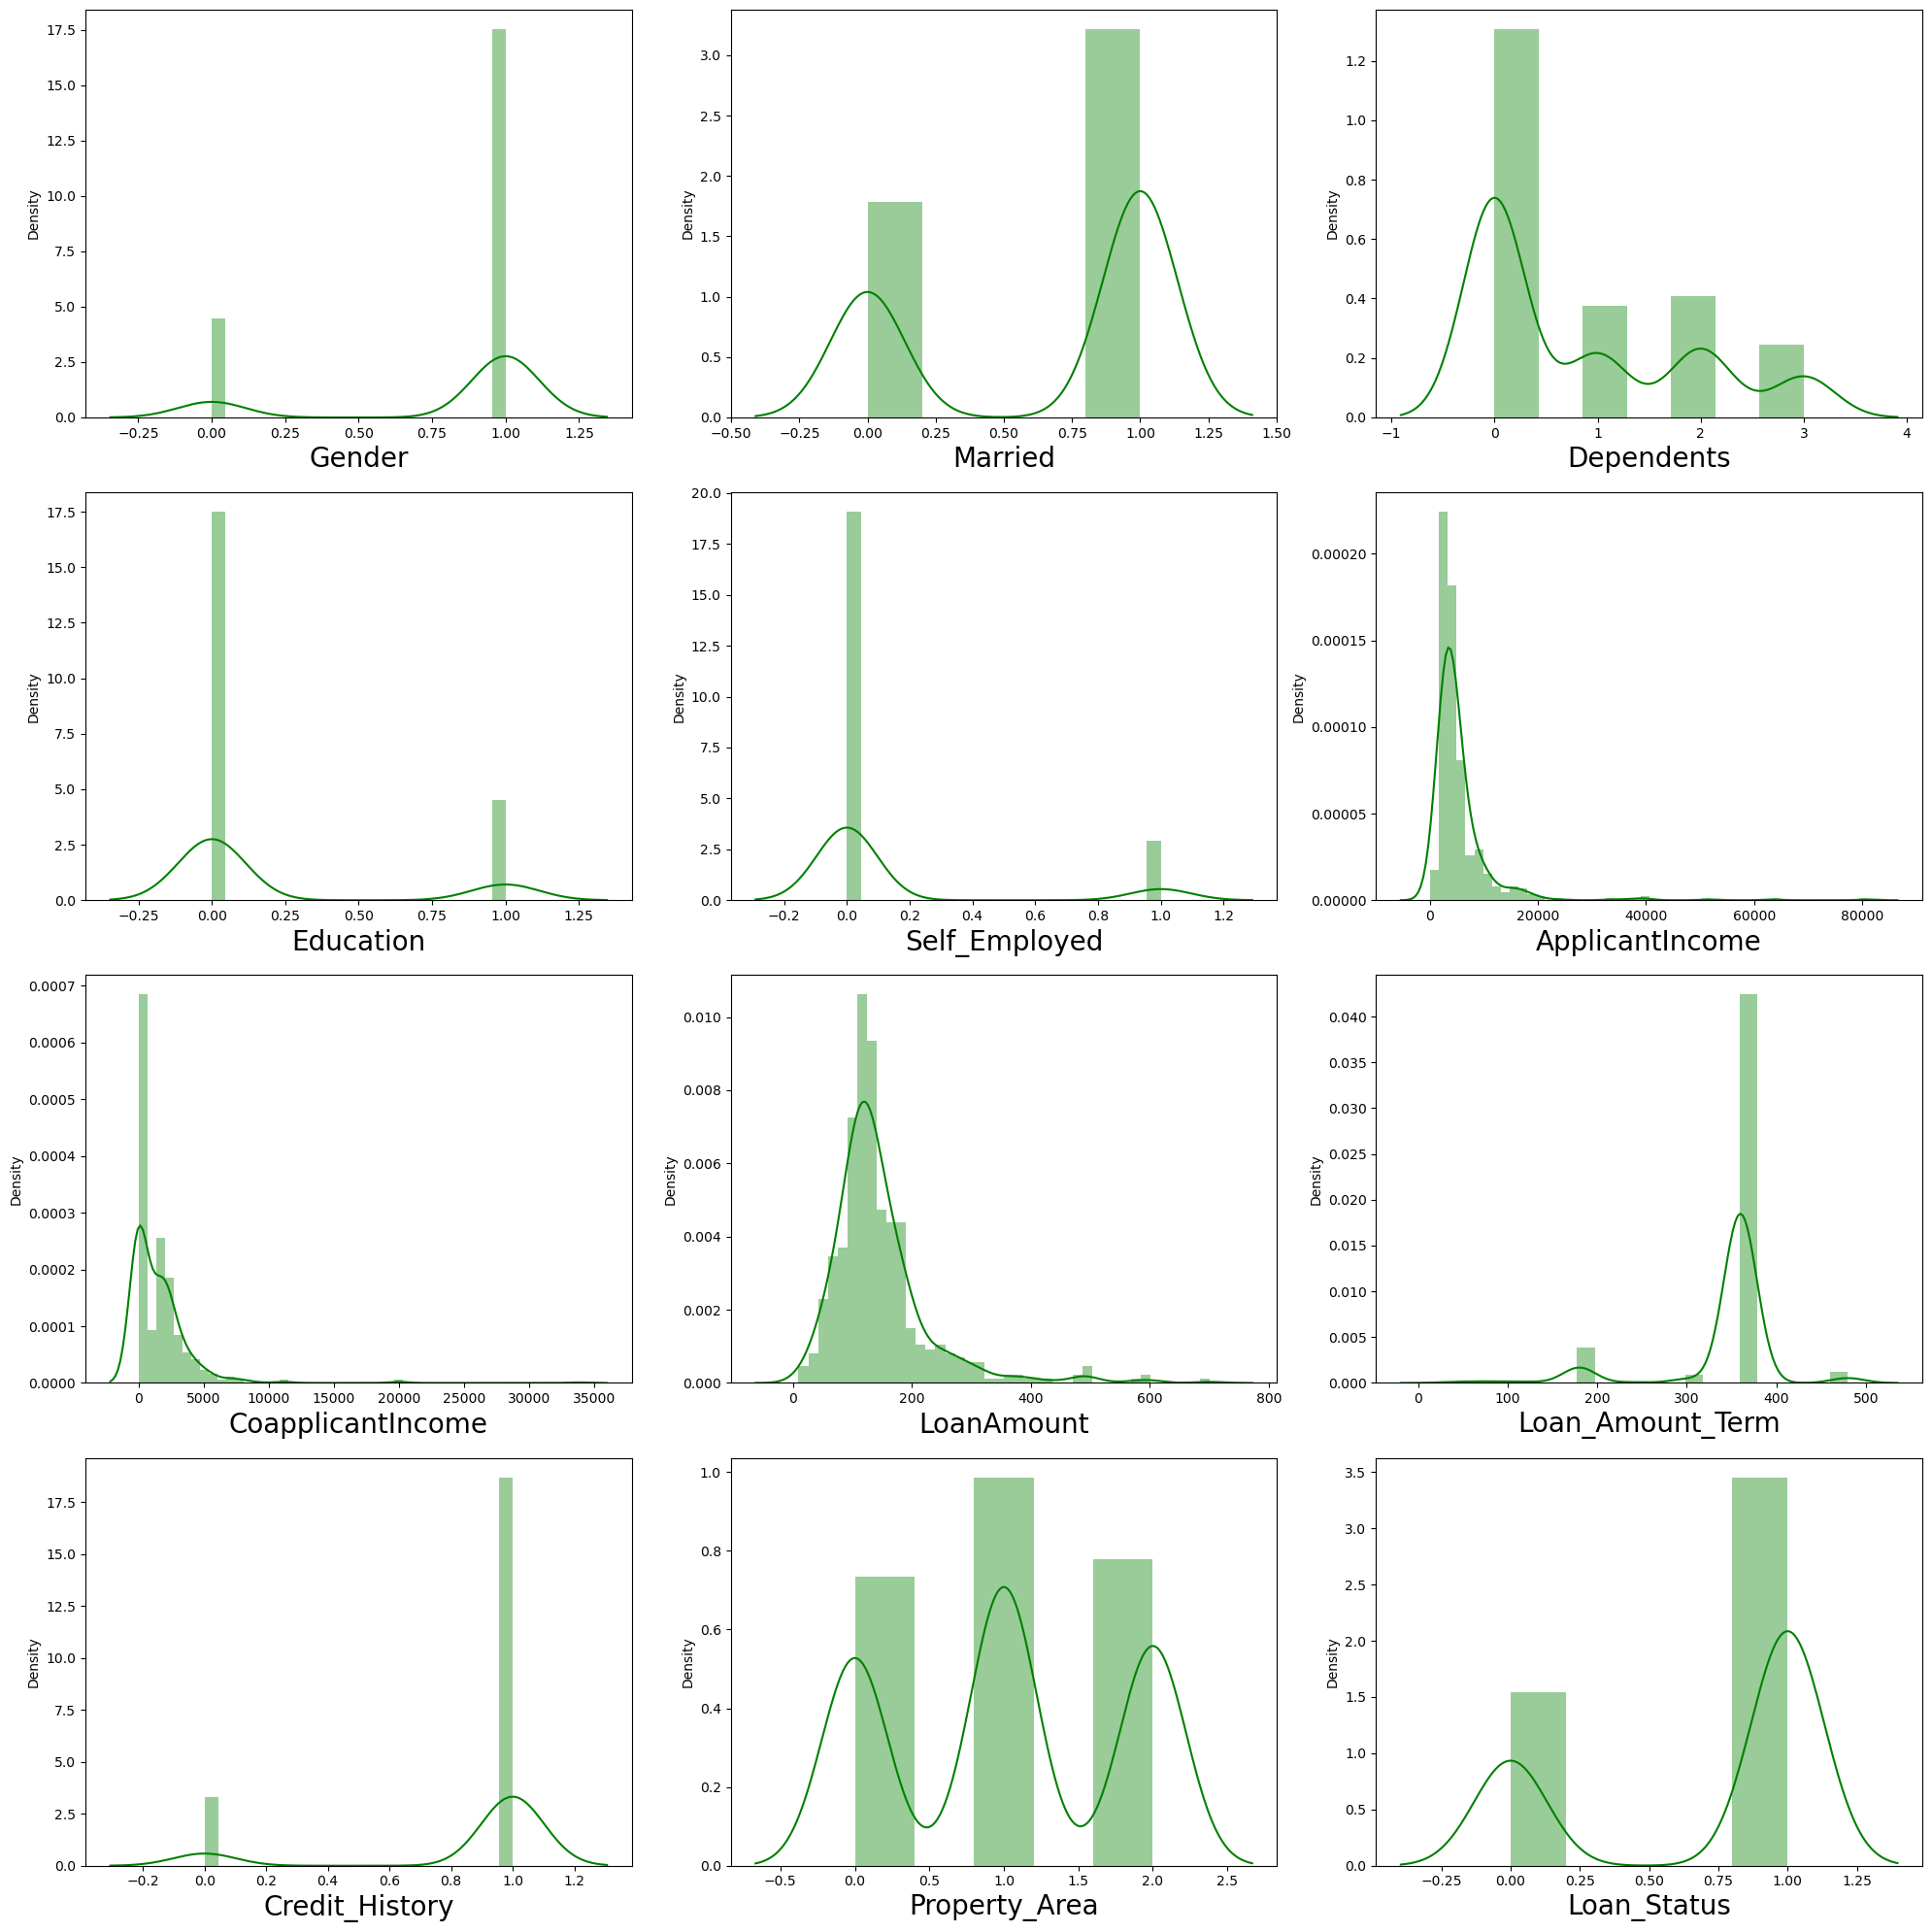

In [34]:
plt.figure(figsize=(20,20) )
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column],color='green')
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.tight_layout()

In [36]:
x =data.drop(['Loan_Status'], axis =1)
y =data['Loan_Status']

In [37]:
x.skew().sort_values(ascending=False)

ApplicantIncome      6.458060
CoapplicantIncome    5.983440
LoanAmount           2.605172
Self_Employed        2.169915
Education            1.466157
Dependents           0.886333
Property_Area       -0.029673
Married             -0.599842
Gender              -1.480699
Credit_History      -1.967038
Loan_Amount_Term    -2.305709
dtype: float64

In [38]:
x_new =power_transform(x)
x = pd.DataFrame(x_new, columns= x.columns)
x.skew().sort_values(ascending=False)

Self_Employed        2.169915
Education            1.466157
Loan_Amount_Term     0.411194
Dependents           0.360041
LoanAmount           0.031718
ApplicantIncome     -0.104914
CoapplicantIncome   -0.131707
Property_Area       -0.144448
Married             -0.599842
Gender              -1.480699
Credit_History      -1.967038
dtype: float64

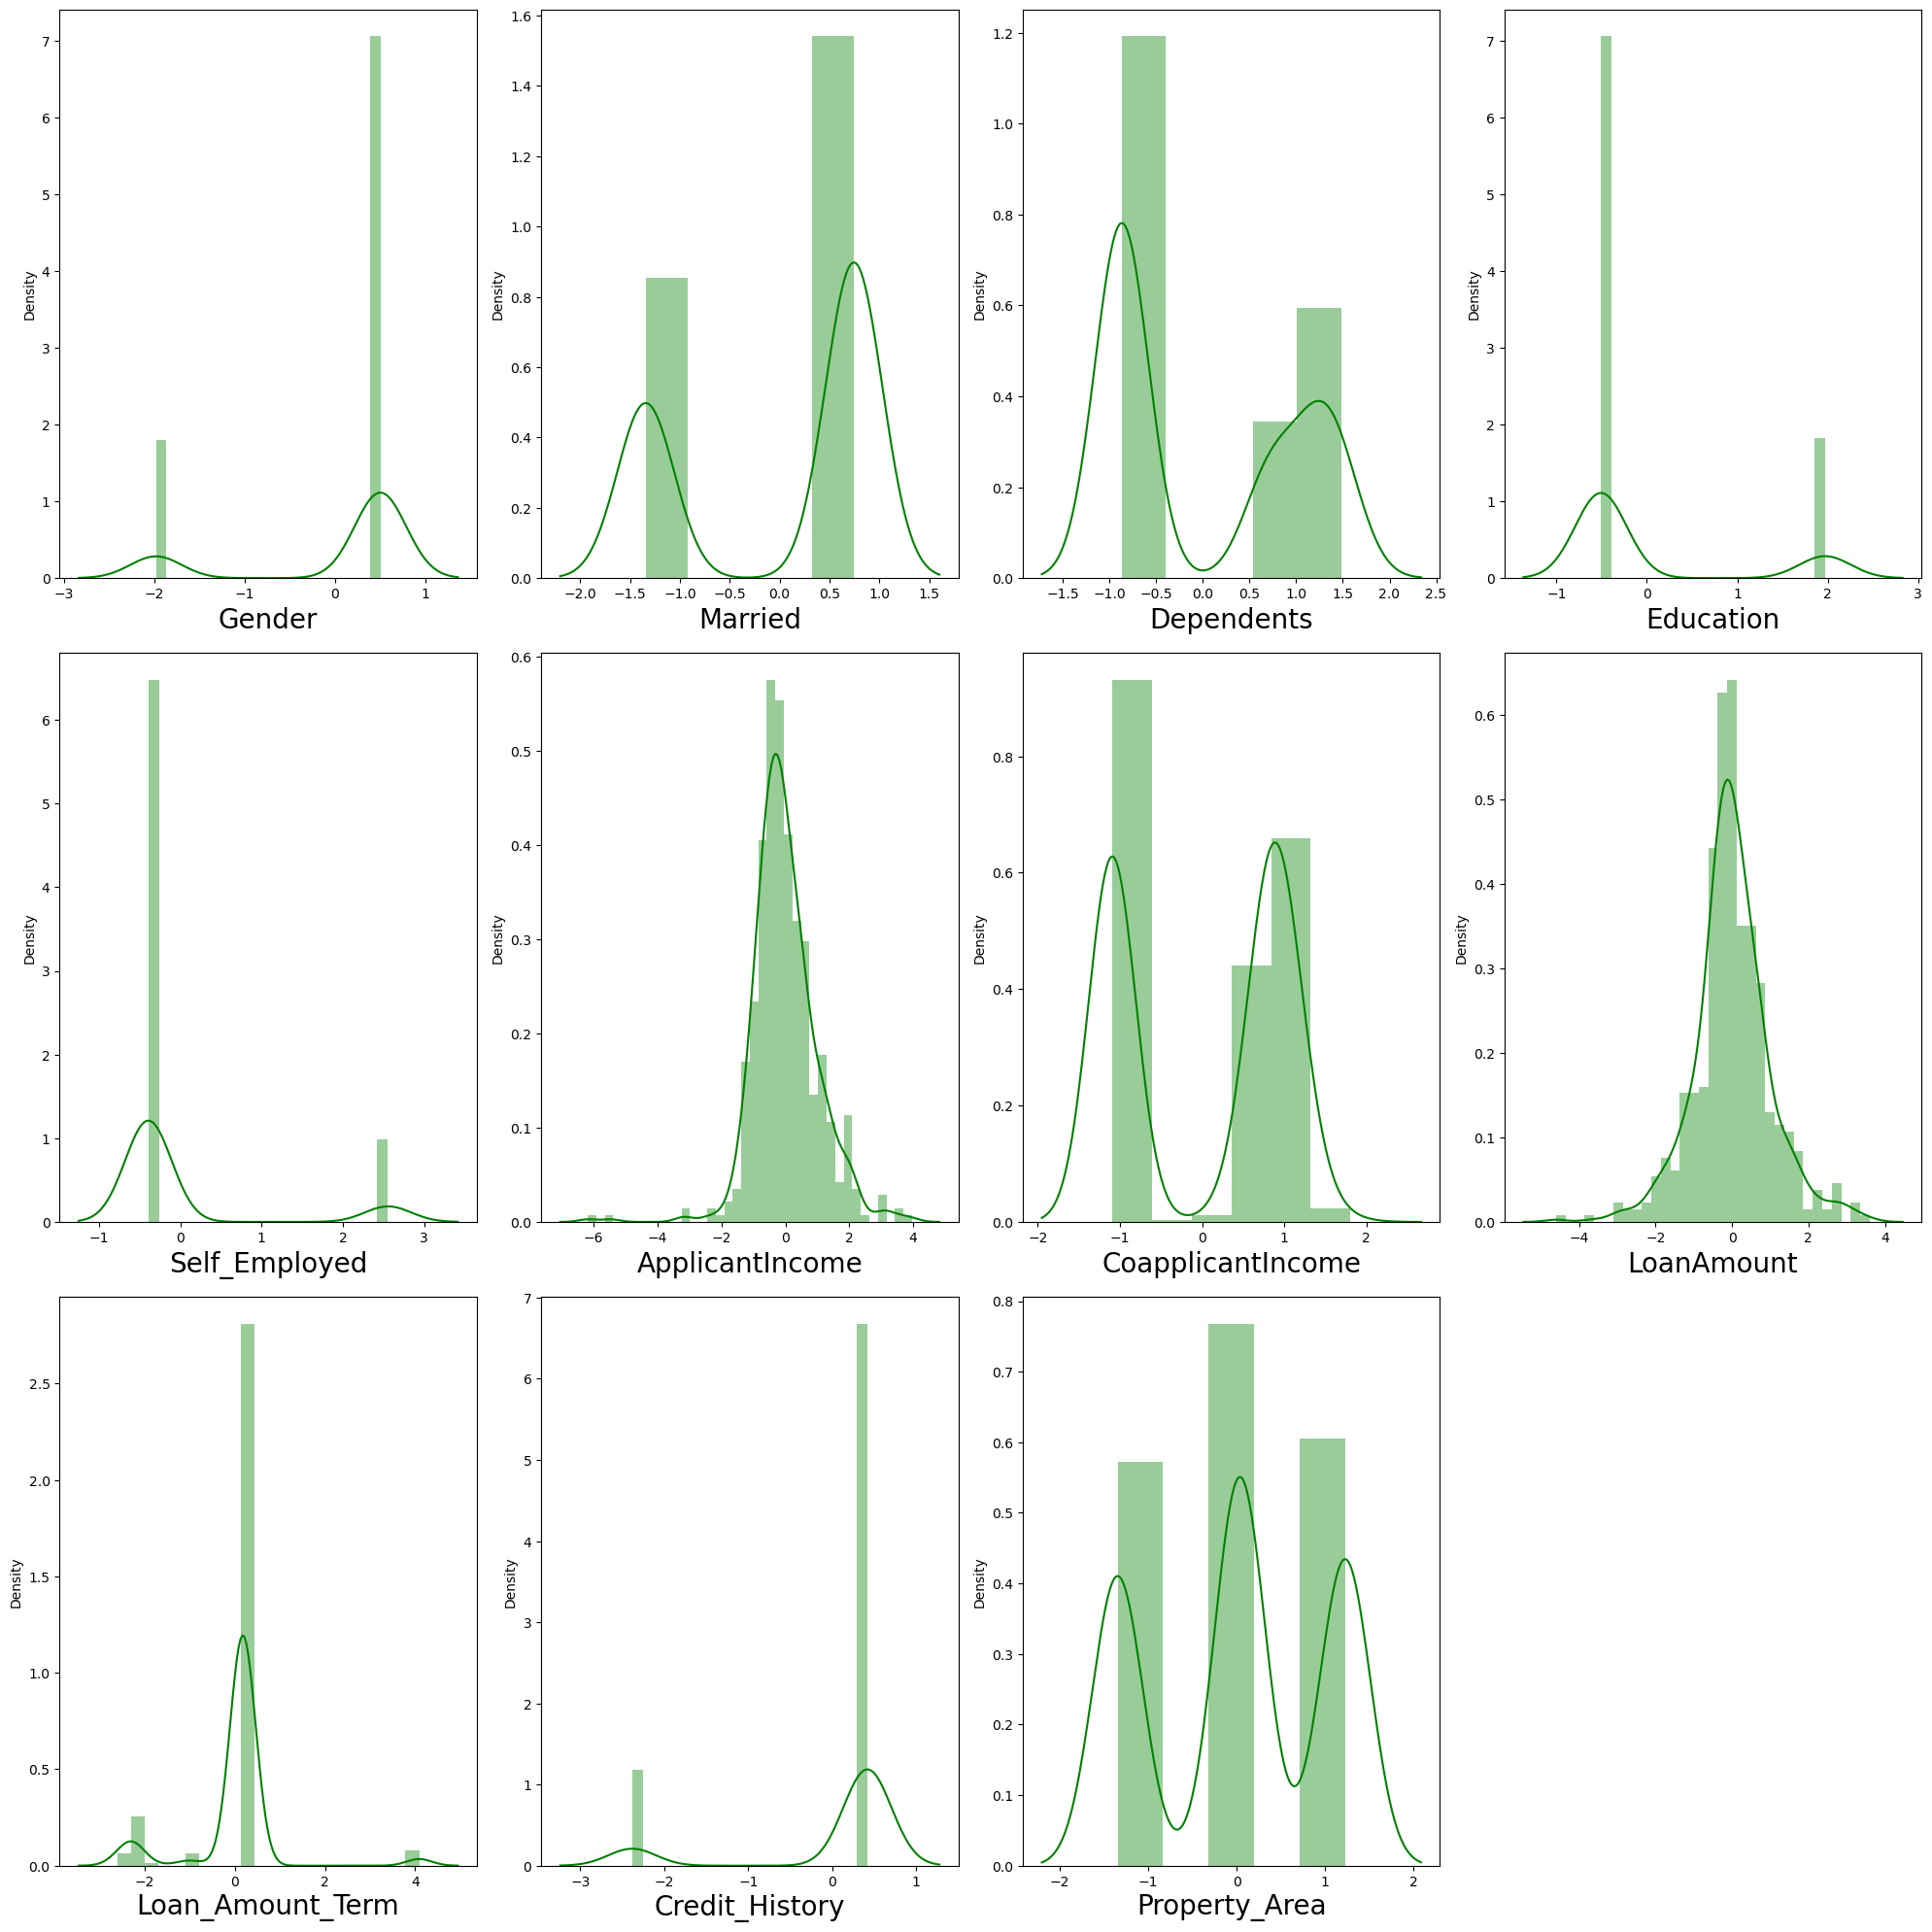

In [39]:
plt.figure(figsize=(20,20) )
plotnumber=1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x[column], color='green')
        plt.xlabel(column,fontsize=20)
        

    plotnumber+=1
plt.tight_layout()

In [41]:
scaler = StandardScaler()
scaler.fit_transform(x)

array([[ 0.50473944,  0.74469609,  0.72297836, ...,  0.17653185,
         0.41992771, -1.34541056],
       [ 0.50473944,  0.74469609, -0.86843354, ...,  0.17653185,
         0.41992771,  1.2251203 ],
       [ 0.50473944,  0.74469609, -0.86843354, ...,  0.17653185,
         0.41992771,  1.2251203 ],
       ...,
       [ 0.50473944,  0.74469609,  0.72297836, ...,  0.17653185,
         0.41992771,  1.2251203 ],
       [ 0.50473944,  0.74469609,  1.231909  , ...,  0.17653185,
         0.41992771,  1.2251203 ],
       [-1.98122024, -1.34282966, -0.86843354, ...,  0.17653185,
        -2.38136223,  0.03662936]])

In [43]:
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size= 0.25, random_state =i)
    rfc =RandomForestClassifier()
    rfc.fit(x_train,y_train)
    y_pred =rfc.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('accuracy',acc,'random state',i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('accuracy', maxAccu, 'random state',i)

accuracy 0.7803030303030303 random state 1
accuracy 0.7803030303030303 random state 1
accuracy 0.8257575757575758 random state 2
accuracy 0.8257575757575758 random state 2
accuracy 0.803030303030303 random state 3
accuracy 0.7803030303030303 random state 4
accuracy 0.7954545454545454 random state 5
accuracy 0.8106060606060606 random state 6
accuracy 0.8409090909090909 random state 7
accuracy 0.8409090909090909 random state 7
accuracy 0.803030303030303 random state 8
accuracy 0.8257575757575758 random state 9
accuracy 0.7878787878787878 random state 10
accuracy 0.803030303030303 random state 11
accuracy 0.8106060606060606 random state 12
accuracy 0.7878787878787878 random state 13
accuracy 0.8181818181818182 random state 14
accuracy 0.8181818181818182 random state 15
accuracy 0.8106060606060606 random state 16
accuracy 0.8257575757575758 random state 17
accuracy 0.7045454545454546 random state 18
accuracy 0.7954545454545454 random state 19
accuracy 0.803030303030303 random state 20
accu

In [44]:
x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size= 0.25, random_state =99)

In [45]:
lr =LogisticRegression()
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)

In [46]:
print('Accuracy score   :',accuracy_score(y_test,y_pred))
print("\n",'Confusion Matrix :',confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy score   : 0.8863636363636364

 Confusion Matrix : [[24 12]
 [ 3 93]]

               precision    recall  f1-score   support

           0       0.89      0.67      0.76        36
           1       0.89      0.97      0.93        96

    accuracy                           0.89       132
   macro avg       0.89      0.82      0.84       132
weighted avg       0.89      0.89      0.88       132



In [47]:
scr = cross_val_score(lr,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8141608391608391


In [48]:
# SVC
svc =svm.SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred =svc.predict(x_test)

In [49]:
print('Accuracy score   :',accuracy_score(y_test,y_pred))
print("\n",'Confusion Matrix :',confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy score   : 0.9015151515151515

 Confusion Matrix : [[24 12]
 [ 1 95]]

               precision    recall  f1-score   support

           0       0.96      0.67      0.79        36
           1       0.89      0.99      0.94        96

    accuracy                           0.90       132
   macro avg       0.92      0.83      0.86       132
weighted avg       0.91      0.90      0.90       132



In [51]:
# Random Forest Classifier
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred =rf.predict(x_test)

In [52]:
print('Accuracy score   :',accuracy_score(y_test,y_pred))
print("\n",'Confusion Matrix :',confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy score   : 0.8863636363636364

 Confusion Matrix : [[26 10]
 [ 5 91]]

               precision    recall  f1-score   support

           0       0.84      0.72      0.78        36
           1       0.90      0.95      0.92        96

    accuracy                           0.89       132
   macro avg       0.87      0.84      0.85       132
weighted avg       0.88      0.89      0.88       132



In [53]:
scr = cross_val_score(rf,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.8103438228438229


In [54]:
# Decision Tree Classifier
dtc =DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred =dtc.predict(x_test)

In [55]:
print('Accuracy score   :',accuracy_score(y_test,y_pred))
print("\n",'Confusion Matrix :',confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy score   : 0.7348484848484849

 Confusion Matrix : [[26 10]
 [25 71]]

               precision    recall  f1-score   support

           0       0.51      0.72      0.60        36
           1       0.88      0.74      0.80        96

    accuracy                           0.73       132
   macro avg       0.69      0.73      0.70       132
weighted avg       0.78      0.73      0.75       132



In [56]:
scr = cross_val_score(dtc,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.715413752913753


In [57]:
# KNN Classifier
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred =knn.predict(x_test)

In [58]:
print('Accuracy score   :',accuracy_score(y_test,y_pred))
print("\n",'Confusion Matrix :',confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

Accuracy score   : 0.8484848484848485

 Confusion Matrix : [[22 14]
 [ 6 90]]

               precision    recall  f1-score   support

           0       0.79      0.61      0.69        36
           1       0.87      0.94      0.90        96

    accuracy                           0.85       132
   macro avg       0.83      0.77      0.79       132
weighted avg       0.84      0.85      0.84       132



In [59]:
scr = cross_val_score(knn,x,y, cv=8)
print("Cross Validation score",scr.mean())

Cross Validation score 0.7856643356643356


## Training

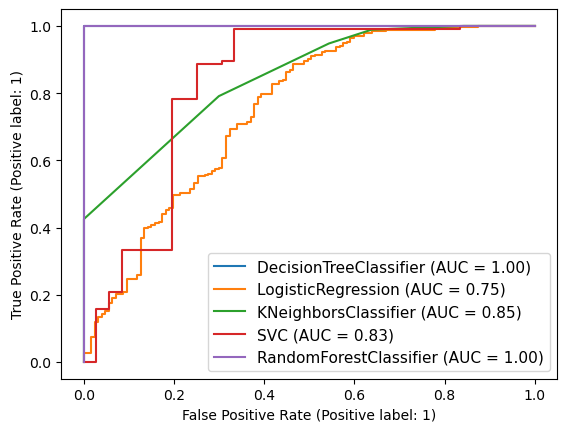

In [60]:
disp =plot_roc_curve(dtc,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_) # ax_  = Axes with confusion matrix

plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

plt.show()

## Testing

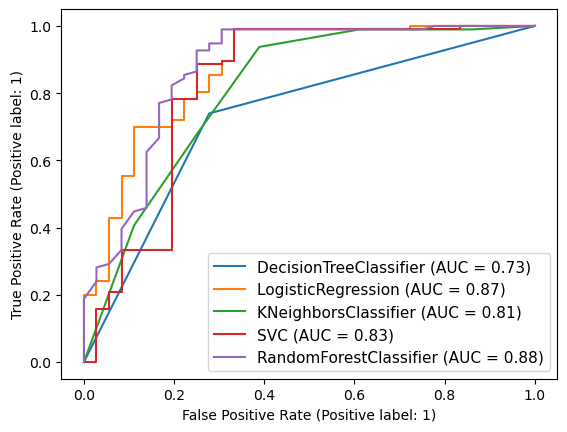

In [61]:
disp =plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_) # ax_  = Axes with confusion matrix

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

plt.show()